In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter = 1000, tol=1e-3, 
                     random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

## Classification Model using Sequential API

In [ ]:
import math
import random
import matplotlib.pyplot as plt

def images(no_of_images=25):
    row, col = int(math.sqrt(no_of_images)), int(math.sqrt(no_of_images))
    fig, subplots = plt.subplots(nrows=row, ncols=col)
    fig.set_figheight(int(no_of_images/4))
    fig.set_figwidth(int(no_of_images/4))
    for r_plot in subplots:
        for plot in r_plot:
            r_in = random.randint(0, 59999)
            plot.imshow(X_train_full[r_in], cmap=plt.cm.binary)
            plot.set_title(class_names[y_train_full[r_in]])
            plot.axis(False)

In [ ]:
# Importing Keras
from tensorflow import keras

# Loading Dataset from Keras
mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# checking shape of data
X_train_full.shape, X_train_full.dtype

# Creating Validation dataset
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-Shirts/Top", "Trousers", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneakers", "Bag", "Ankle Boot"]

4431872/4422102 [==============================] - 0s 0us/step


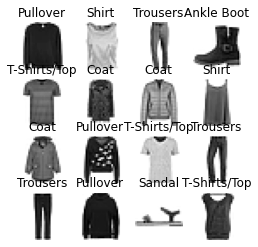

In [ ]:
images(18)

In [ ]:
# Creating the model using Sequential API
model = keras.Sequential()  # Defining model
# Flatten(Make it 1D array) the Input because our image is 28 x 28 matrices
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# Dense(Fully Connected Layer) with relu activation
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # Output Layer

In [ ]:
## Another way to use Sequential API
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28), name="input_layer"), 
        keras.layers.Dense(300, activation="relu", name="hidden_layer_1"), 
        keras.layers.Dense(200, activation="relu", name="hidden_layer_2"), 
        keras.layers.Dense(10, activation="softmax", name="output_layer")
])

In [ ]:
# Get model Info
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 200)               60200     
                                                                 
 output_layer (Dense)        (None, 10)                2010      
                                                                 
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Get Model's Layer
model.layers

In [ ]:
# Get Model's Specific Layer
model.layers[1].name

'hidden_layer_1'

In [ ]:
# Get Model's Layer By name
model.get_layer("hidden_layer_1").name

'hidden_layer_1'

In [ ]:
# Getting Parameters(Weights and biasas) of model
hidden_1 = model.get_layer("hidden_layer_1")
weights, biases = hidden_1.get_weights()
weights, weights.shape, biases, biases.shape

(array([[-0.06060925,  0.06038116,  0.07061897, ...,  0.05724546,
          0.04400272,  0.01163525],
        [-0.04475887, -0.03783105, -0.04816347, ...,  0.0112378 ,
         -0.01621737, -0.03789542],
        [-0.05261821,  0.00902637, -0.00538681, ...,  0.00089172,
         -0.00634829,  0.05662648],
        ...,
        [ 0.05175097, -0.06850776,  0.07415244, ..., -0.00747322,
          0.0593776 , -0.02002048],
        [-0.04075279,  0.04388822, -0.05061042, ...,  0.07134438,
          0.00363587, -0.04070937],
        [ 0.00919465,  0.0028609 , -0.0234937 , ..., -0.00504624,
         -0.06453166, -0.06129786]], dtype=float32),
 (784, 300),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0

In [ ]:
# Compiling The Model
model.compile(loss="sparse_categorical_crossentropy", # loss function
              optimizer="sgd", # optimizer
              metrics=["accuracy"] # Performance Metric
)

In [ ]:
# Training the Model And saving the history
history = model.fit(x=X_train, y=y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7200 - accuracy: 0.7651 - val_loss: 0.5204 - val_accuracy: 0.8242
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4890 - accuracy: 0.8297 - val_loss: 0.4544 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4440 - accuracy: 0.8461 - val_loss: 0.4141 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4160 - accuracy: 0.8551 - val_loss: 0.4241 - val_accuracy: 0.8560
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3966 - accuracy: 0.8594 - val_loss: 0.4058 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3804 - accuracy: 0.8658 - val_loss: 0.3721 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3673 - accuracy: 0.8704 - val_loss: 0.3931 - val_accuracy:

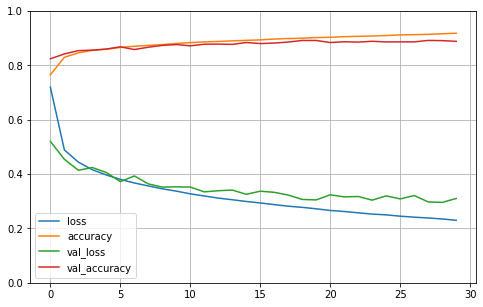

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 71.6653 - accuracy: 0.8324


[71.66531372070312, 0.8324000239372253]

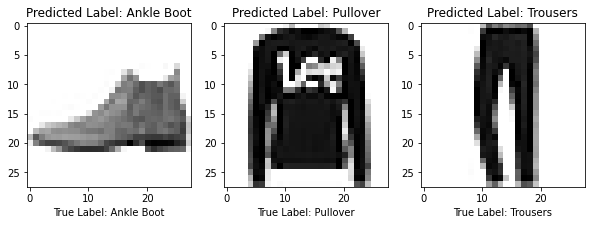

In [ ]:
import numpy as np

X_new = X_test[:3]
y_prob = model.predict(X_new)
y_pred = np.argmax(y_prob, axis=1)

fig, subplots = plt.subplots(nrows=1, ncols=3)
fig.set_figwidth(10)
for i, plot in enumerate(subplots):
    plot.imshow(X_new[i], cmap=plt.cm.binary)
    # plot.axis(False)
    plot.set_title("Predicted Label: {}".format(class_names[y_pred[i]]))
    plot.set_xlabel("True Label: {}".format(class_names[y_test[i]]))

## Regression Model using Sequential API

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing  = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, 
                                                              housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow import keras
model = keras.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), 
        keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20, 
                    validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
mse_test, y_pred

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2703 - val_loss: 0.5808
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5232 - val_loss: 0.5124
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4786 - val_loss: 0.4702
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4441 - val_loss: 0.4464
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4262 - val_loss: 0.4301
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4147 - val_loss: 0.4170
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4051 - val_loss: 0.4103
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3980 - val_loss: 0.4176
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3937 - val_loss: 0.3999
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3889 - val_loss: 0.4005

(0.3728908896446228, array([[291.1767 ],
        [174.27556],
        [216.81638]], dtype=float32))

In [ ]:
mse_test, y_pred

(0.3728908896446228, array([[291.1767 ],
        [174.27556],
        [216.81638]], dtype=float32))

## Functional API

In [ ]:
from tensorflow import keras

input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], 
                           outputs=[output])

In [ ]:
# Sending a Input as parts
from tensorflow import keras
input_A = keras.layers.Input(shape=(5,))
input_B = keras.layers.Input(shape=(6,))
hidden_1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat = keras.layers.concatenate([input_A, hidden_2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], 
                           outputs=[output])
model.compile(loss="mae", 
              optimizer="sgd", 
              metrics=["accuracy"])

In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit(x=(X_train_A, X_train_B), y=y_train, epochs=20, 
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 28113.2148 - accuracy: 0.0016 - val_loss: 13251.6973 - val_accuracy: 0.0000e+00
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 10374.8662 - accuracy: 0.0013 - val_loss: 11338.9512 - val_accuracy: 0.0036
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 10354.8711 - accuracy: 0.0010 - val_loss: 5740.3843 - val_accuracy: 0.0036
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 10365.8916 - accuracy: 0.0016 - val_loss: 3103.3108 - val_accuracy: 0.0036
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 10345.0225 - accuracy: 0.0014 - val_loss: 14662.6973 - val_accuracy: 0.0036
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 10420.4668 - accuracy: 0.0013 - val_loss: 2275.7214 - val_accuracy: 0.0036
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 10304.3428 - accuracy: 0.

In [ ]:
mse_test

nan

In [ ]:
# Model with more output
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden_1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat = keras.layers.concatenate([input_A, hidden_2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden_2)
model = keras.models.Model(inputs=[input_A, input_B], 
                           outputs=[output, aux_output])
model.compile(loss="mae", optimizer="sgd", 
              loss_weights=[0.9, 0.1])
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 9682.3770 - dense_42_loss: 10742.8535 - dense_43_loss: 138.0936 - val_loss: 9276.1475 - val_dense_42_loss: 10306.6406 - val_dense_43_loss: 1.7283
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 8545.9893 - dense_42_loss: 9495.3584 - dense_43_loss: 1.6746 - val_loss: 20998.8613 - val_dense_42_loss: 23331.9062 - val_dense_43_loss: 1.3962
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 8569.3799 - dense_42_loss: 9521.3926 - dense_43_loss: 1.2601 - val_loss: 8655.0381 - val_dense_42_loss: 9616.5771 - val_dense_43_loss: 1.1780
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 8533.7959 - dense_42_loss: 9481.8613 - dense_43_loss: 1.0939 - val_loss: 1848.0286 - val_dense_42_loss: 2053.2483 - val_dense_43_loss: 1.0532
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 8544.6396 - dense_42_loss: 9493.9316 - dense_43_loss: 0.

## Using Subclassing API

In [ ]:
from tensorflow import keras

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_ouptut = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_ouptut(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

In [ ]:
model.compile(loss="mae", 
              optimizer="sgd", 
              metrics=["accuracy"])
model.fit(x=(X_train_A, X_train_B), y=y_train, epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 10378.7803 - accuracy: 0.0015
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 10345.1504 - accuracy: 0.0012
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 10399.8369 - accuracy: 0.0017
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 10391.1143 - accuracy: 0.0015
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 10350.0781 - accuracy: 0.0015
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 10363.9902 - accuracy: 8.6133e-04
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 10361.1924 - accuracy: 0.0021
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 10402.8857 - accuracy: 0.0020
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 10352.9482 - accuracy: 0.0015
Epoch 10/20
363/363 [==============================] - 1s 1m

## Saving the model

In [ ]:
# Saving the model
model.save("my_model.h5")

# Loading the model
my_model = keras.models.load_model("my_model.h5")

## Using Callbacks

In [ ]:
def WideAndDeep(units=30):
    input = keras.layers.Input(shape=X_train.shape[1:])
    hidden1 = keras.layers.Dense(units, activation="relu")(input)
    hidden2 = keras.layers.Dense(units, activation="relu")(hidden1)
    concat = keras.layers.Concatenate()([input, hidden2])
    output = keras.layers.Dense(1)(concat)
    model = keras.models.Model(inputs=[input], 
                            outputs=[output])
    model.compile(loss="mae", optimizer="sgd", metrics=["accuracy"])
    return model

In [ ]:
model = WideAndDeep()
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5", 
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 11958.0693 - accuracy: 0.0015 - val_loss: 17613.9023 - val_accuracy: 0.0023
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 10606.3555 - accuracy: 0.0013 - val_loss: 10592.8975 - val_accuracy: 0.0000e+00
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 10607.8740 - accuracy: 0.0018 - val_loss: 10723.6875 - val_accuracy: 0.0023
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 10576.3916 - accuracy: 0.0018 - val_loss: 8800.6338 - val_accuracy: 0.0023
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 10541.7051 - accuracy: 0.0014 - val_loss: 7786.0259 - val_accuracy: 0.0000e+00
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 10621.0518 - accuracy: 0.0013 - val_loss: 5181.9385 - val_accuracy: 0.0023
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 10606.5068 - accuracy

In [ ]:
model = WideAndDeep()
early_stopping = keras.callbacks.EarlyStopping(patience=10, 
                                               restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_model.h5")
model.fit(X_train, y_train, 
          epochs=100, 
          validation_data=(X_valid, y_valid), 
          callbacks=[early_stopping, checkpoint_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 3404811970019328.0000 - accuracy: 0.0012 - val_loss: 32661.5215 - val_accuracy: 0.0000e+00
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 11051.8916 - accuracy: 0.0015 - val_loss: 19607.8262 - val_accuracy: 0.0000e+00
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 10366.1738 - accuracy: 0.0016 - val_loss: 4539.9214 - val_accuracy: 0.0036
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 10381.0820 - accuracy: 0.0012 - val_loss: 17043.3984 - val_accuracy: 0.0036
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 10315.6865 - accuracy: 9.4746e-04 - val_loss: 13574.1611 - val_accuracy: 0.0036
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 10354.4668 - accuracy: 0.0011 - val_loss: 15639.4209 - val_accuracy: 0.0036
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - los

In [ ]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 1ms/step - loss: 1261.7394 - accuracy: 0.0000e+00


[1261.7393798828125, 0.0]

In [ ]:
# Custom Callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:2f}".format(logs["val_loss"]/logs["loss"]))

model = WideAndDeep()
vnt_ratio = PrintValTrainRatioCallback()
model.fit(X_train, y_train, epochs=100, 
          validation_data=(X_valid, y_valid), 
          callbacks=[checkpoint_cb, 
                     early_stopping, 
                     vnt_ratio])

Epoch 1/100
349/363 [===========================>..] - ETA: 0s - loss: 18083.1348 - accuracy: 0.0014
val/train: 0.171441
363/363 [==============================] - 1s 2ms/step - loss: 17799.0840 - accuracy: 0.0016 - val_loss: 3051.4973 - val_accuracy: 0.0000e+00
Epoch 2/100
336/363 [==========================>...] - ETA: 0s - loss: 10517.1699 - accuracy: 0.0020
val/train: 1.738182
363/363 [==============================] - 1s 2ms/step - loss: 10560.8271 - accuracy: 0.0019 - val_loss: 18356.6445 - val_accuracy: 0.0000e+00
Epoch 3/100
348/363 [===========================>..] - ETA: 0s - loss: 10551.6602 - accuracy: 0.0018
val/train: 1.099963
363/363 [==============================] - 1s 2ms/step - loss: 10619.6289 - accuracy: 0.0018 - val_loss: 11681.1963 - val_accuracy: 0.0000e+00
Epoch 4/100
362/363 [============================>.] - ETA: 0s - loss: 10513.7168 - accuracy: 0.0018
val/train: 0.618186
363/363 [==============================] - 1s 2ms/step - loss: 10518.8086 - accuracy: 0.

## Tensorboard

In [ ]:
def SimpleRegressor(units_1=30, units_2=10):
    model = keras.Sequential([
            keras.layers.Dense(units=units_1, activation="relu"), 
            keras.layers.Dense(units=units_1, activation="relu"), 
            keras.layers.Dense(units=units_2, activation="relu"), 
            keras.layers.Dense(units=units_2, activation="relu"), 
            keras.layers.Dense(units=1)
    ])
    model.compile(loss="mae", 
                  optimizer="sgd", 
                  metrics=["accuracy"])
    return model

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
model = SimpleRegressor(units_1=300, units_2=100)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(x=X_train, 
                    y=y_train, 
                    epochs=200, 
                    validation_data=(X_valid, y_valid), 
                    callbacks=[early_stopping, tensorboard_cb])

Epoch 1/200
363/363 [==============================] - 2s 4ms/step - loss: nan - accuracy: 8.6133e-05 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/200
363/363 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/200
363/363 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/200
316/363 [=========================>....] - ETA: 0s - loss: nan - accuracy: 0.0000e+00

KeyboardInterrupt: ignored